In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_cifar_batch(file):
    data_dict = unpickle(file)
    images = data_dict[b'data']
    labels = data_dict[b'labels']
    images = images.reshape(len(images), 3, 32, 32).transpose(0, 2, 3, 1)
    return images, np.array(labels)

def load_cifar10(data_dir):
    train_images = []
    train_labels = []
    for i in range(1, 6):
        batch_filename = f'{data_dir}/data_batch_{i}'
        images, labels = load_cifar_batch(batch_filename)
        train_images.append(images)
        train_labels.append(labels)
    train_images = np.concatenate(train_images, axis=0)
    train_labels = np.concatenate(train_labels, axis=0)

    test_filename = f'{data_dir}/test_batch'
    test_images, test_labels = load_cifar_batch(test_filename)

    return (train_images, train_labels), (test_images, test_labels)


data_dir = '/content/drive/MyDrive/Computer Vision Coursework/cifar-10-batches-py'


(X_train, y_train), (X_test, y_test) = load_cifar10(data_dir)


print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [ ]:
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)


input_X_train = X_train.astype('float32')
input_X_test = X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 50

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/50
313/313 [==============================] - 90s 268ms/step - loss: 1.8795 - accuracy: 0.2851 - val_loss: 1.5171 - val_accuracy: 0.4334
Epoch 2/50
313/313 [==============================] - 75s 241ms/step - loss: 1.4657 - accuracy: 0.4560 - val_loss: 1.3196 - val_accuracy: 0.5227
Epoch 3/50
313/313 [==============================] - 77s 246ms/step - loss: 1.3241 - accuracy: 0.5195 - val_loss: 1.1941 - val_accuracy: 0.5733
Epoch 4/50
313/313 [==============================] - 72s 230ms/step - loss: 1.2271 - accuracy: 0.5596 - val_loss: 1.0961 - val_accuracy: 0.6181
Epoch 5/50
313/313 [==============================] - 76s 244ms/step - loss: 1.1557 - accuracy: 0.5886 - val_loss: 0.9875 - val_accuracy: 0.6543
Epoch 6/50
313/313 [==============================] - 72s 230ms/step - loss: 1.0941 - accuracy: 0.6070 - val_loss: 0.9310 - val_accuracy: 0.6751
Epoch 7/50
313/313 [==============================] - 76s 243ms/step - loss: 1.0505 - accuracy: 0.6246 - val_loss: 0.8914 - val_ac

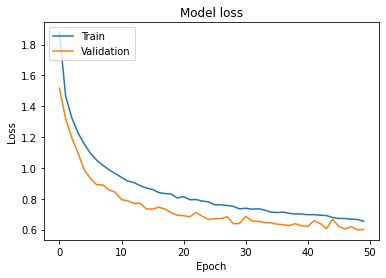

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

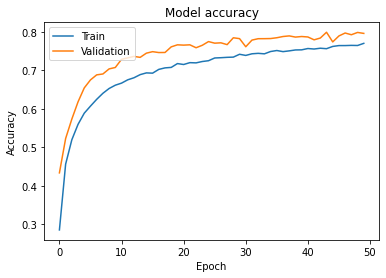

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 9s 30ms/step - loss: 0.6297 - accuracy: 0.7878
Test loss: 0.629694402217865
Test accuracy: 0.7878000140190125


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 100

history_100=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
313/313 [==============================] - 77s 233ms/step - loss: 1.8795 - accuracy: 0.2851 - val_loss: 1.5171 - val_accuracy: 0.4334
Epoch 2/100
313/313 [==============================] - 70s 225ms/step - loss: 1.4657 - accuracy: 0.4560 - val_loss: 1.3196 - val_accuracy: 0.5227
Epoch 3/100
313/313 [==============================] - 60s 190ms/step - loss: 1.3241 - accuracy: 0.5195 - val_loss: 1.1941 - val_accuracy: 0.5733
Epoch 4/100
313/313 [==============================] - 48s 153ms/step - loss: 1.2271 - accuracy: 0.5596 - val_loss: 1.0961 - val_accuracy: 0.6181
Epoch 5/100
313/313 [==============================] - 47s 151ms/step - loss: 1.1557 - accuracy: 0.5886 - val_loss: 0.9875 - val_accuracy: 0.6543
Epoch 6/100
313/313 [==============================] - 45s 144ms/step - loss: 1.0941 - accuracy: 0.6070 - val_loss: 0.9310 - val_accuracy: 0.6751
Epoch 7/100
313/313 [==============================] - 44s 140ms/step - loss: 1.0505 - accuracy: 0.6246 - val_loss: 0.8914 -

Epoch 57/100
313/313 [==============================] - 57s 183ms/step - loss: 0.6575 - accuracy: 0.7699 - val_loss: 0.5992 - val_accuracy: 0.7987
Epoch 58/100
313/313 [==============================] - 45s 144ms/step - loss: 0.6455 - accuracy: 0.7747 - val_loss: 0.5822 - val_accuracy: 0.8068
Epoch 59/100
313/313 [==============================] - 44s 140ms/step - loss: 0.6495 - accuracy: 0.7705 - val_loss: 0.5968 - val_accuracy: 0.8010
Epoch 60/100
313/313 [==============================] - 43s 138ms/step - loss: 0.6396 - accuracy: 0.7742 - val_loss: 0.5917 - val_accuracy: 0.8058
Epoch 61/100
313/313 [==============================] - 44s 140ms/step - loss: 0.6455 - accuracy: 0.7728 - val_loss: 0.6321 - val_accuracy: 0.7900
Epoch 62/100
313/313 [==============================] - 44s 139ms/step - loss: 0.6343 - accuracy: 0.7762 - val_loss: 0.6096 - val_accuracy: 0.8021
Epoch 63/100
313/313 [==============================] - 43s 138ms/step - loss: 0.6334 - accuracy: 0.7788 - val_loss: 0

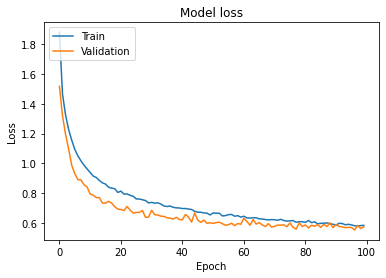

In [ ]:
plt.plot(history_100.history['loss'])
plt.plot(history_100.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

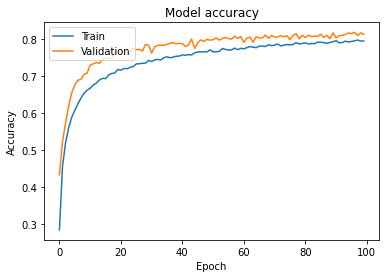

In [ ]:
plt.plot(history_100.history['accuracy'])
plt.plot(history_100.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 4s 13ms/step - loss: 0.5987 - accuracy: 0.7988
Test loss: 0.5987300276756287
Test accuracy: 0.798799991607666


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 100

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/100
313/313 [==============================] - 44s 138ms/step - loss: 1.8732 - accuracy: 0.2885 - val_loss: 1.4822 - val_accuracy: 0.4453
Epoch 2/100
313/313 [==============================] - 43s 136ms/step - loss: 1.4552 - accuracy: 0.4632 - val_loss: 1.2822 - val_accuracy: 0.5336
Epoch 3/100
313/313 [==============================] - 42s 134ms/step - loss: 1.3137 - accuracy: 0.5189 - val_loss: 1.1801 - val_accuracy: 0.5801
Epoch 4/100
313/313 [==============================] - 46s 147ms/step - loss: 1.2220 - accuracy: 0.5584 - val_loss: 1.0703 - val_accuracy: 0.6251
Epoch 5/100
313/313 [==============================] - 46s 146ms/step - loss: 1.1527 - accuracy: 0.5892 - val_loss: 0.9804 - val_accuracy: 0.6600
Epoch 6/100
313/313 [==============================] - 47s 150ms/step - loss: 1.0935 - accuracy: 0.6101 - val_loss: 0.9489 - val_accuracy: 0.6735
Epoch 7/100
313/313 [==============================] - 56s 178ms/step - loss: 1.0491 - accuracy: 0.6292 - val_loss: 0.9049 -

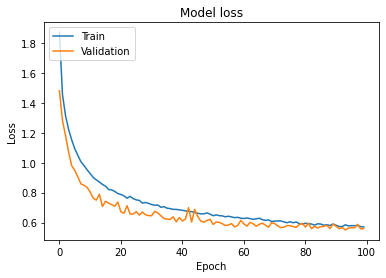

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

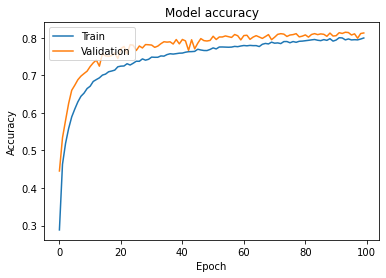

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 5s 14ms/step - loss: 0.5758 - accuracy: 0.8072
Test loss: 0.5757504105567932
Test accuracy: 0.807200014591217


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model


input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 200

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/200
313/313 [==============================] - 42s 132ms/step - loss: 1.8732 - accuracy: 0.2885 - val_loss: 1.4822 - val_accuracy: 0.4453
Epoch 2/200
313/313 [==============================] - 41s 131ms/step - loss: 1.4552 - accuracy: 0.4632 - val_loss: 1.2822 - val_accuracy: 0.5336
Epoch 3/200
313/313 [==============================] - 41s 132ms/step - loss: 1.3137 - accuracy: 0.5189 - val_loss: 1.1801 - val_accuracy: 0.5801
Epoch 4/200
313/313 [==============================] - 41s 130ms/step - loss: 1.2220 - accuracy: 0.5584 - val_loss: 1.0703 - val_accuracy: 0.6251
Epoch 5/200
313/313 [==============================] - 41s 130ms/step - loss: 1.1527 - accuracy: 0.5892 - val_loss: 0.9804 - val_accuracy: 0.6600
Epoch 6/200
313/313 [==============================] - 41s 130ms/step - loss: 1.0935 - accuracy: 0.6101 - val_loss: 0.9489 - val_accuracy: 0.6735
Epoch 7/200
313/313 [==============================] - 40s 128ms/step - loss: 1.0491 - accuracy: 0.6292 - val_loss: 0.9049 -

Epoch 57/200
313/313 [==============================] - 42s 135ms/step - loss: 0.6378 - accuracy: 0.7750 - val_loss: 0.5926 - val_accuracy: 0.8007
Epoch 58/200
313/313 [==============================] - 42s 133ms/step - loss: 0.6326 - accuracy: 0.7768 - val_loss: 0.5710 - val_accuracy: 0.8085
Epoch 59/200
313/313 [==============================] - 42s 134ms/step - loss: 0.6351 - accuracy: 0.7761 - val_loss: 0.5804 - val_accuracy: 0.8052
Epoch 60/200
313/313 [==============================] - 42s 133ms/step - loss: 0.6287 - accuracy: 0.7779 - val_loss: 0.6140 - val_accuracy: 0.7941
Epoch 61/200
313/313 [==============================] - 42s 134ms/step - loss: 0.6273 - accuracy: 0.7792 - val_loss: 0.5915 - val_accuracy: 0.8057
Epoch 62/200
313/313 [==============================] - 51s 162ms/step - loss: 0.6303 - accuracy: 0.7784 - val_loss: 0.5763 - val_accuracy: 0.8065
Epoch 63/200
313/313 [==============================] - 49s 155ms/step - loss: 0.6264 - accuracy: 0.7795 - val_loss: 0

313/313 [==============================] - 50s 161ms/step - loss: 0.5208 - accuracy: 0.8168 - val_loss: 0.5443 - val_accuracy: 0.8202
Epoch 168/200
313/313 [==============================] - 50s 161ms/step - loss: 0.5182 - accuracy: 0.8184 - val_loss: 0.5488 - val_accuracy: 0.8138
Epoch 169/200
313/313 [==============================] - 47s 149ms/step - loss: 0.5268 - accuracy: 0.8156 - val_loss: 0.5359 - val_accuracy: 0.8188
Epoch 170/200
313/313 [==============================] - 45s 144ms/step - loss: 0.5241 - accuracy: 0.8159 - val_loss: 0.5289 - val_accuracy: 0.8230
Epoch 171/200
313/313 [==============================] - 45s 144ms/step - loss: 0.5241 - accuracy: 0.8153 - val_loss: 0.5256 - val_accuracy: 0.8233
Epoch 172/200
313/313 [==============================] - 44s 141ms/step - loss: 0.5195 - accuracy: 0.8162 - val_loss: 0.5428 - val_accuracy: 0.8170
Epoch 173/200
313/313 [==============================] - 45s 144ms/step - loss: 0.5192 - accuracy: 0.8175 - val_loss: 0.5562 -

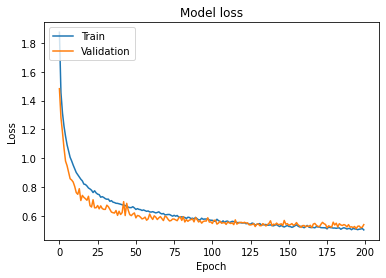

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

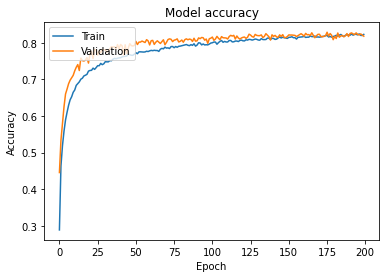

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 6s 19ms/step - loss: 0.5633 - accuracy: 0.8093
Test loss: 0.5632730722427368
Test accuracy: 0.8093000054359436


In [ ]:
seed_value = 42
tf.random.set_seed(seed_value)

In [ ]:
def create_cnn_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten layer
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

input_shape = (32, 32, 3)
cnn_model = create_cnn_model(input_shape)

# Compile model
cnn_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 128
epochs = 200

history=cnn_model.fit(input_X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2 , verbose=1)


Epoch 1/200
313/313 [==============================] - 12s 15ms/step - loss: 1.8366 - accuracy: 0.3039 - val_loss: 1.4805 - val_accuracy: 0.4583
Epoch 2/200
313/313 [==============================] - 3s 9ms/step - loss: 1.4371 - accuracy: 0.4706 - val_loss: 1.2649 - val_accuracy: 0.5388
Epoch 3/200
313/313 [==============================] - 3s 10ms/step - loss: 1.3055 - accuracy: 0.5259 - val_loss: 1.1757 - val_accuracy: 0.5774
Epoch 4/200
313/313 [==============================] - 6s 18ms/step - loss: 1.2200 - accuracy: 0.5623 - val_loss: 1.0443 - val_accuracy: 0.6414
Epoch 5/200
313/313 [==============================] - 3s 10ms/step - loss: 1.1501 - accuracy: 0.5895 - val_loss: 0.9861 - val_accuracy: 0.6508
Epoch 6/200
313/313 [==============================] - 3s 9ms/step - loss: 1.0899 - accuracy: 0.6144 - val_loss: 0.9813 - val_accuracy: 0.6502
Epoch 7/200
313/313 [==============================] - 4s 12ms/step - loss: 1.0437 - accuracy: 0.6319 - val_loss: 0.8886 - val_accuracy: 

In [ ]:
model_json = cnn_model.to_json()
open('/content/drive/MyDrive/cifar10_architecture.json', 'w').write(model_json)

#save the trained weights
cnn_model.save_weights('/content/drive/MyDrive/cifar10_weights.h5', overwrite=True)

print('Files saved for model definition and for weights.')

Files saved for model definition and for weights.


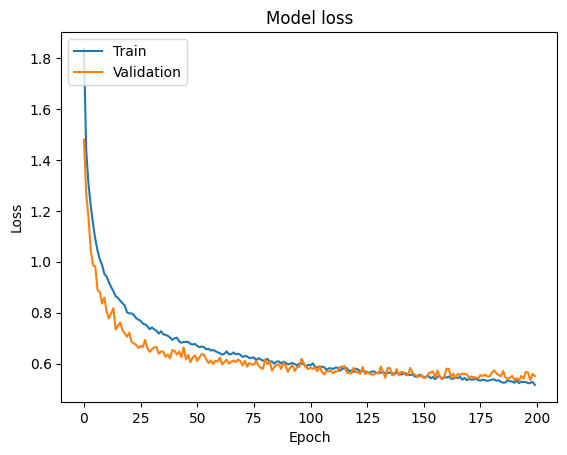

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

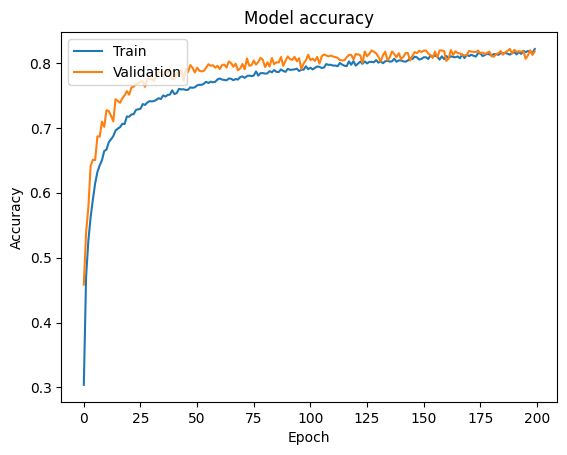

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(input_X_test, Y_test)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.5695 - accuracy: 0.8132
Test loss: 0.569463312625885
Test accuracy: 0.8131999969482422
